<a href="https://www.kaggle.com/code/nishankavinda/predict-the-customer-satisfaction-cse-22?scriptVersionId=240042655" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/sample_submission.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv


# Data Import

Before running following commands, you need to input the dataset. In the top-right corner of the notebook, click on "Input," search for the competition name, and select the relevant competition to load the data into your notebook.

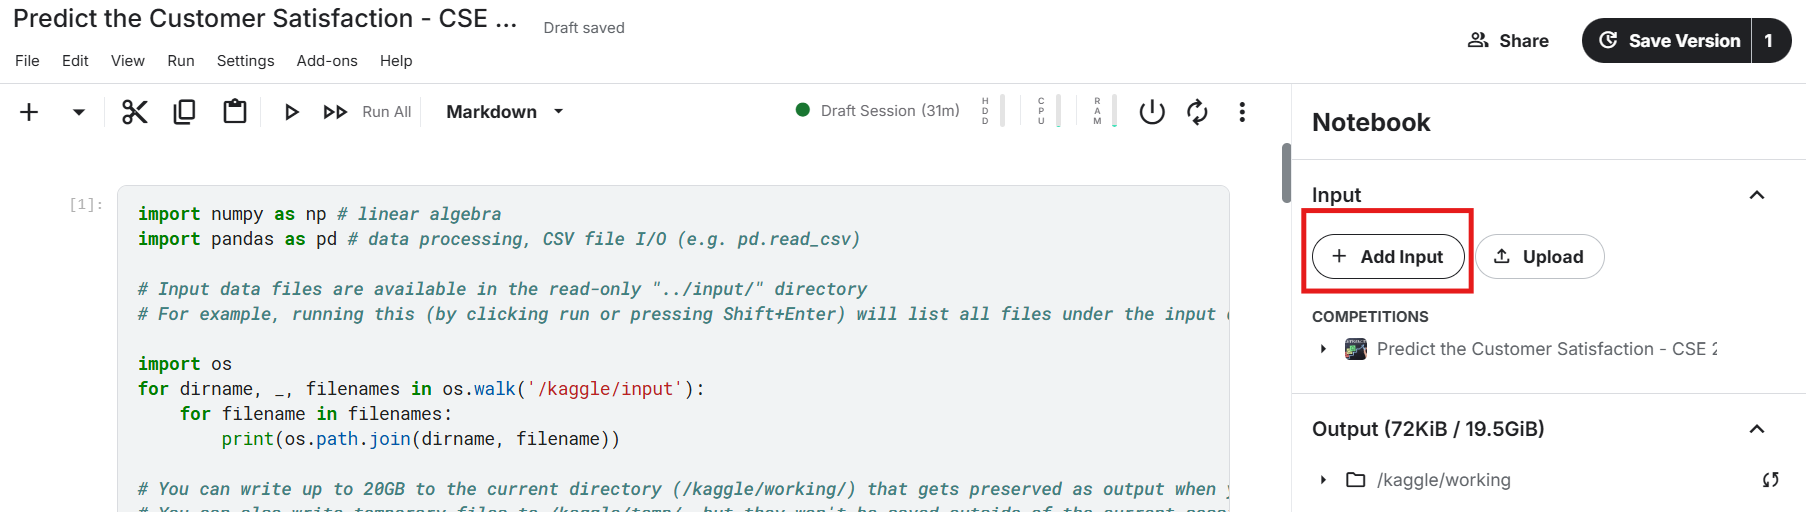

In [2]:
data = pd.read_csv('/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv')
test = pd.read_csv('/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv')

In [3]:
data

id     user_id  age Gender Date_Registered  \
0            0  ****589084   44      O      2020-01-01   
1            1  ****494191   36      O      2020-01-04   
2            2  ****216469   40      F      2020-01-02   
3            3  ****707170   33      M      2020-01-06   
4            4  ****066329   43      O      2020-01-06   
...        ...         ...  ...    ...             ...   
206964  206964  ****708759   19      M      2024-12-18   
206965  206965  ****074598   54      M      2024-12-27   
206966  206966  ****016861   25      O      2024-12-02   
206967  206967  ****741534   54      M      2024-12-12   
206968  206968  ****773537   35      F      2024-11-23   

       Is_current_loyalty_program_member  loyalty_points_redeemed  \
0                                     NO                        5   
1                                    YES                        4   
2                                     NO                        3   
3                                    YES                        1   
4                                    YES                        1   
...                                  ...                      ...   
206964                                NO                        4   
206965                                NO                        2   
206966                               YES                        4   
206967                                NO                        0   
206968                               YES                        4   

        loyalty_tier  Received_tier_discount_percentage  \
0                NaN                                NaN   
1                1.0                                3.0   
2                NaN                                NaN   
3                1.0                                3.0   
4                1.0                                3.0   
...              ...                                ...   
206964           NaN                                NaN   
206965           NaN                                NaN   
206966           4.0                               10.0   
206967           NaN                                NaN   
206968           2.0                                5.0   

        Received_card_discount_percentage  ...     payment_datetime  \
0                                     3.0  ...  2020-01-05 22:27:16   
1                                     4.0  ...  2020-01-06 00:37:51   
2                                     3.0  ...  2020-01-07 03:02:35   
3                                     2.0  ...  2020-01-09 22:05:39   
4                                     4.0  ...  2020-01-11 08:32:22   
...                                   ...  ...                  ...   
206964                                3.0  ...  2024-12-28 23:51:36   
206965                                1.0  ...  2024-12-28 23:54:24   
206966                                4.0  ...  2024-12-28 23:57:17   
206967                                NaN  ...  2024-12-28 23:57:28   
206968                                NaN  ...  2024-12-28 23:59:39   

         purchased_datetime  purchase_medium final_payment released_date  \
0       2020-01-05 22:27:16           online       1293.00    2020-01-12   
1       2020-01-06 00:37:51         in-store       4522.44    2020-01-07   
2       2020-01-07 03:02:35           online       5628.00    2020-01-12   
3       2020-01-09 22:05:39         in-store       2073.32    2020-01-13   
4       2020-01-11 08:32:22           online        310.86    2020-01-15   
...                     ...              ...           ...           ...   
206964  2024-12-28 23:51:36           online       5533.00    2024-12-31   
206965  2024-12-28 23:54:24           online       4910.00    2024-12-30   
206966  2024-12-28 23:57:17         in-store       4558.99    2025-01-04   
206967  2024-12-28 23:57:28           online       8900.00    2024-12-30   
206968  2024-12-28 23:59:39         in-store       6829.00    2024-12-30   

       esti

# Get Idea about DataFrame

Before starting our analysis, it’s crucial to understand the structure of the dataset. We begin by examining the data types of each column, the total number of entries, the count of missing values, and the number of unique items in each column. This helps us identify the overall composition of the dataset and any potential issues such as missing or inconsistent data.

In [4]:
desc = pd.DataFrame(index=data.columns.to_list())
desc['type'] = data.dtypes
desc['count'] = data.count()
desc['nunique'] = data.nunique()
desc['null'] = data.isnull().sum()
desc

type   count  nunique    null
id                                     int64  206969   206969       0
user_id                               object  206969   186931       0
age                                    int64  206969       44       0
Gender                                object  206969        3       0
Date_Registered                       object  206969     1823       0
Is_current_loyalty_program_member     object  206969        2       0
loyalty_points_redeemed                int64  206969        6       0
loyalty_tier                         float64  104902        4  102067
Received_tier_discount_percentage    float64  103590        4  103379
Received_card_discount_percentage    float64   50090      104  156879
Received_coupon_discount_percentage    int64  206969      202       0
product_category                      object  206969       20       0
Product_value                          int64  206969    11583       0
transaction_id                        object  206969   206739       0
order_id                              object  206969   187196       0
payment_method                        object  206969       13       0
payment_datetime                      object  206969   206682       0
purchased_datetime                    object  206969   206682       0
purchase_medium                       object  206969        2       0
final_payment                        float64  206969    32898       0
released_date                         object  206969     1811       0
estimated_delivery_date               object  206969     1820       0
received_date                         object  206969     1816       0
shipping_method                       object  206969        2       0
tracking_number                       object  206969   206957       0
customer_experience                   object  206969        3       0

In [5]:
data['Gender'].unique()

array(['O', 'F', 'M'], dtype=object)

For example, the `Gender` column contains three unique values: `'F'`, `'M'`, and `'O'`. 
Similarly, the `product_category` column has 20 unique values. 
If you'd like to explore the unique values in any specific column, you can use the `data['column_name'].unique()`. Give it a try!

In [6]:
data.describe()

id            age  loyalty_points_redeemed   loyalty_tier  \
count  206969.000000  206969.000000            206969.000000  104902.000000   
mean   103484.000000      38.624668                 2.472481       2.459762   
std     59746.948269      12.800575                 1.718771       1.127135   
min         0.000000       0.000000                 0.000000       1.000000   
25%     51742.000000      28.000000                 1.000000       1.000000   
50%    103484.000000      39.000000                 2.000000       2.000000   
75%    155226.000000      50.000000                 4.000000       3.000000   
max    206968.000000      60.000000                 5.000000       4.000000   

       Received_tier_discount_percentage  Received_card_discount_percentage  \
count                      103590.000000                       50090.000000   
mean                            6.243875                          10.780775   
std                             2.582244                          33.524402   
min                             3.000000                           1.000000   
25%                             5.000000                           2.000000   
50%                             5.000000                           3.000000   
75%                             7.000000                           4.000000   
max                            10.000000                         199.000000   

       Received_coupon_discount_percentage  Product_value  final_payment  
count                        206969.000000  206969.000000  206969.000000  
mean                              4.147244    5322.859462    5142.777076  
std                              18.867409    4304.731507    2847.272560  
min                               0.000000      50.000000     101.000000  
25%                               1.000000    2563.000000    2680.000000  
50%                               3.000000    5080.000000    5134.000000  
75%                               4.000000    7592.000000    7591.000000  
max                             299.000000   49992.000000   10298.000000

Using `data.describe()`, we can gain insights into the distribution of the data, including metrics like minimum, maximum, mean, count, and more.

# Data Cleaning

In [7]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206969 entries, 0 to 206968
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   206969 non-null  int64  
 1   user_id                              206969 non-null  object 
 2   age                                  206969 non-null  int64  
 3   Gender                               206969 non-null  object 
 4   Date_Registered                      206969 non-null  object 
 5   Is_current_loyalty_program_member    206969 non-null  object 
 6   loyalty_points_redeemed              206969 non-null  int64  
 7   loyalty_tier                         104902 non-null  float64
 8   Received_tier_discount_percentage    103590 non-null  float64
 9   Received_card_discount_percentage    50090 non-null   float64
 10  Received_coupon_discount_percentage  206969 non-null  int64  
 11  product_categ

Here, we observe that the `age` column has an `int64` data type. Since all values are below 60, we can optimize memory usage by converting it to `int8`. 

Additionally, columns such as `'Date_Registered'`, `'payment_datetime'`, `'purchased_datetime'`, `'released_date'`, `'estimated_delivery_date'`, and `'received_date'` can be converted to the `datetime` data type instead of `object` in pandas. 

This conversion is meaningful for processing, as it enables us to extract additional features. For example, we can derive the day of the week from the `received_date` column using: `df['receive_day_of_week'] = df['received_date'].dt.dayofweek`.

## Date Time

In [8]:
def date_time(df):
    date_columns = ['Date_Registered', 'payment_datetime', 'purchased_datetime', 
                    'released_date', 'estimated_delivery_date', 'received_date']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    return df

data = date_time(data)
test= date_time(test)

## Duplicates and Null Values

In [9]:
duplicates = data[data.drop(columns=['id']).duplicated()]
duplicates

id     user_id  age Gender Date_Registered  \
14559    14559  ****072270   42      F      2020-05-13   
20151    20151  ****416486   27      M      2022-01-08   
28656    28656  ****345402   18      F      2021-01-25   
53426    53426  ****884430   39      O      2020-09-24   
80225    80225  ****012883   53      O      2023-02-24   
93722    93722  ****069674   29      M      2023-07-01   
104620  104620  ****339486   19      M      2023-04-18   
120427  120427  ****243936   26      M      2024-02-03   
126418  126418  ****329163   50      O      2022-09-26   
170816  170816  ****378334   18      F      2024-01-20   
181466  181466  ****057257   60      O      2022-07-21   
187424  187424  ****032876   57      O      2024-03-21   

       Is_current_loyalty_program_member  loyalty_points_redeemed  \
14559                                 NO                        5   
20151                                 NO                        0   
28656                                YES                        4   
53426                                YES                        3   
80225                                YES                        1   
93722                                YES                        1   
104620                                NO                        2   
120427                                NO                        1   
126418                               YES                        0   
170816                               YES                        3   
181466                                NO                        3   
187424                               YES                        4   

        loyalty_tier  Received_tier_discount_percentage  \
14559            NaN                                NaN   
20151            NaN                                NaN   
28656            3.0                                7.0   
53426            2.0                                5.0   
80225            1.0                                3.0   
93722            1.0                                3.0   
104620           NaN                                NaN   
120427           NaN                                NaN   
126418           3.0                                7.0   
170816           3.0                                7.0   
181466           NaN                                NaN   
187424           2.0                                5.0   

        Received_card_discount_percentage  ...    payment_datetime  \
14559                                 5.0  ... 2021-10-06 08:32:51   
20151                                 NaN  ... 2022-01-16 02:22:24   
28656                                 NaN  ... 2022-05-23 09:42:22   
53426                                 NaN  ... 2023-02-18 05:18:00   
80225                                 1.0  ... 2023-09-11 15:10:35   
93722                                 NaN  ... 2023-12-03 03:04:26   
104620                                2.0  ... 2024-01-30 23:08:26   
120427                                NaN  ... 2024-04-15 11:27:51   
126418                                1.0  ... 2024-05-11 09:47:44   
170816                                NaN  ... 2024-10-13 18:32:52   
181466                                NaN  ... 2024-11-10 09:40:02   
187424                                5.0  ... 2024-11-24 01:56:32   

        purchased_datetime  purchase_medium final_payment released_date  \
14559  2021-10-06 08:32:51           online       4820.00    2021-10-12   
20151  2022-01-16 02:22:24           online       5914.00    2022-01-20   
28656  2022-05-23 09:42:22           online       5914.00    2022-05-26   
53426  2023-02-18 05:18:00           online       3235.00    2023-02-23   
80225  2023-09-11 15:10:35           online       5073.85    2023-09-18   
93722  2023-12-03 03:04:26           online       2196.00    2023-12-08   
104620 2024-01-30 23:08:26         in-store       6184.00    2024-02-02   
120427 2024-04-15 11:27:51           online       2110.00    2024-04-20   
12641

In [10]:
# Remove rows that are duplicates when excluding the 'id' column
data = data[~data.drop(columns=['id']).duplicated()]

In [11]:
data.isnull().sum()

id                                          0
user_id                                     0
age                                         0
Gender                                      0
Date_Registered                             0
Is_current_loyalty_program_member           0
loyalty_points_redeemed                     0
loyalty_tier                           102062
Received_tier_discount_percentage      103374
Received_card_discount_percentage      156872
Received_coupon_discount_percentage         0
product_category                            0
Product_value                               0
transaction_id                              0
order_id                                    0
payment_method                              0
payment_datetime                            0
purchased_datetime                          0
purchase_medium                             0
final_payment                               0
released_date                               0
estimated_delivery_date           

In [12]:
data = data[data['age'] > 0]

In [13]:
data.fillna({
    'Received_tier_discount_percentage': 0,
    'Received_card_discount_percentage': 0,
    'Received_coupon_discount_percentage': 0,
    'loyalty_tier': -1
}, inplace=True)

test.fillna({
    'Received_tier_discount_percentage': 0,
    'Received_card_discount_percentage': 0,
    'Received_coupon_discount_percentage': 0,
    'loyalty_tier': -1
}, inplace=True)

## Concat

Before starting the analysis, we need to convert string-based categorical values into numeric formats to better identify patterns in the data. To achieve this, we first concatenate the `data` and `test` datasets for consistent processing.  

**Categorical Encoding**: This technique converts categorical data into numerical formats. There are several methods, with the most common being **label encoding** and **one-hot encoding**.  

**One-Hot Encoding**: This method creates binary columns for each unique category in a column. For example, a column with values `'A'`, `'B'`, and `'C'` will be transformed into three separate columns, one for each category, where the value is `1` for the respective category and `0` otherwise.  

This encoding is particularly useful for algorithms that perform better with numerical inputs.

In [14]:
df = pd.concat([data,test], axis =0)

In [15]:
df = df.drop(columns=['tracking_number', 'order_id'])

In [16]:
# Optimizing data types for df
df['id'] = df['id'].astype('Int32')
df['age'] = df['age'].astype('Int8')
df['loyalty_points_redeemed'] = df['loyalty_points_redeemed'].astype('Int16')
df['Received_coupon_discount_percentage'] = df['Received_coupon_discount_percentage'].astype('Int16')
df['Product_value'] = df['Product_value'].astype('Int32')
df['final_payment'] = df['final_payment'].astype('float32')
df['loyalty_tier'] = df['loyalty_tier'].astype('float32')
df['Received_tier_discount_percentage'] = df['Received_tier_discount_percentage'].astype('float32')
df['Received_card_discount_percentage'] = df['Received_card_discount_percentage'].astype('float32')

### Categorical Encoding

In [17]:
df['shipping_method'] = pd.Categorical(df['shipping_method'], categories=['standard', 'express'], ordered=True)
df['shipping_method'] = df['shipping_method'].cat.codes

df['customer_experience'] = pd.Categorical(df['customer_experience'], categories=['bad', 'neutral','good'], ordered=True)
df['customer_experience'] = df['customer_experience'].cat.codes

In [18]:
df

id     user_id  age Gender Date_Registered  \
0            0  ****589084   44      O      2020-01-01   
1            1  ****494191   36      O      2020-01-04   
2            2  ****216469   40      F      2020-01-02   
3            3  ****707170   33      M      2020-01-06   
4            4  ****066329   43      O      2020-01-06   
...        ...         ...  ...    ...             ...   
137966  137966  ****565215   57      F      2024-12-24   
137967  137967  ****023402   34      O      2024-12-20   
137968  137968  ****101693   42      O      2023-07-15   
137969  137969  ****117354   51      O      2024-12-12   
137970  137970  ****421140   22      O      2024-12-02   

       Is_current_loyalty_program_member  loyalty_points_redeemed  \
0                                     NO                        5   
1                                    YES                        4   
2                                     NO                        3   
3                                    YES                        1   
4                                    YES                        1   
...                                  ...                      ...   
137966                               YES                        3   
137967                               YES                        1   
137968                               YES                        0   
137969                                NO                        2   
137970                               YES                        1   

        loyalty_tier  Received_tier_discount_percentage  \
0               -1.0                                0.0   
1                1.0                                3.0   
2               -1.0                                0.0   
3                1.0                                3.0   
4                1.0                                3.0   
...              ...                                ...   
137966           1.0                                3.0   
137967           4.0                               10.0   
137968           1.0                                3.0   
137969          -1.0                                0.0   
137970           4.0                               10.0   

        Received_card_discount_percentage  ...  payment_method  \
0                                     3.0  ...          visa_c   
1                                     4.0  ...            amex   
2                                     3.0  ...    mastercard_c   
3                                     2.0  ...          visa_c   
4                                     4.0  ...          visa_c   
...                                   ...  ...             ...   
137966                                0.0  ...             otc   
137967                                0.0  ...             otc   
137968                                0.0  ...         coinsph   
137969                                5.0  ...            amex   
137970                                0.0  ...           gcash   

          payment_datetime  purchased_datetime purchase_medium final_payment  \
0      2020-01-05 22:27:16 2020-01-05 22:27:16          online   1293.000000   
1      2020-01-06 00:37:51 2020-01-06 00:37:51        in-store   4522.439941   
2      2020-01-07 03:02:35 2020-01-07 03:02:35          online   5628.000000   
3      2020-01-09 22:05:39 2020-01-09 22:05:39        in-store   2073.320068   
4      2020-01-11 08:32:22 2020-01-11 08:32:22          online    310.859985   
...                    ...                 ...             ...           ...   
137966 2024-12-28 23:50:44 2024-12-28 23:50:44          online   2805.000000   
137967 2024-12-28 23:55:19 2024-12-28 23:55:19        in-store    224.000000   
137968 2024-12-28 23:55:21 2024-12-28 23:55:21        in-store   2392.000000   
137969 2024-12-28 23:58:40 2024-12-28 23:58:40        in-store   2345.000000   
137970 2024-12-28 23:59:10 2024-12-28 23:59:10        in-store   7852.000000   

       released_date es

### One Hot Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(df, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = df.index
    df = pd.concat([df, encoded_columns], axis=1)
    df = df.drop(columns=[column])
    return df

columns_to_encode = ['Gender', 'Is_current_loyalty_program_member', 'purchase_medium']

for col in columns_to_encode:
    df = one_hot_encode_and_add(df, col)

In [20]:
df

id     user_id  age Date_Registered  loyalty_points_redeemed  \
0            0  ****589084   44      2020-01-01                        5   
1            1  ****494191   36      2020-01-04                        4   
2            2  ****216469   40      2020-01-02                        3   
3            3  ****707170   33      2020-01-06                        1   
4            4  ****066329   43      2020-01-06                        1   
...        ...         ...  ...             ...                      ...   
137966  137966  ****565215   57      2024-12-24                        3   
137967  137967  ****023402   34      2024-12-20                        1   
137968  137968  ****101693   42      2023-07-15                        0   
137969  137969  ****117354   51      2024-12-12                        2   
137970  137970  ****421140   22      2024-12-02                        1   

        loyalty_tier  Received_tier_discount_percentage  \
0               -1.0                                0.0   
1                1.0                                3.0   
2               -1.0                                0.0   
3                1.0                                3.0   
4                1.0                                3.0   
...              ...                                ...   
137966           1.0                                3.0   
137967           4.0                               10.0   
137968           1.0                                3.0   
137969          -1.0                                0.0   
137970           4.0                               10.0   

        Received_card_discount_percentage  \
0                                     3.0   
1                                     4.0   
2                                     3.0   
3                                     2.0   
4                                     4.0   
...                                   ...   
137966                                0.0   
137967                                0.0   
137968                                0.0   
137969                                5.0   
137970                                0.0   

        Received_coupon_discount_percentage product_category  ...  \
0                                         3  office supplies  ...   
1                                         1      electronics  ...   
2                                         5     pet supplies  ...   
3                                         3         clothing  ...   
4                                         2            books  ...   
...                                     ...              ...  ...   
137966                                    4             toys  ...   
137967                                    0     pet supplies  ...   
137968                                    5       automotive  ...   
137969                                    2           beauty  ...   
137970                                    0       automotive  ...   

        received_date shipping_method customer_experience Gender_F Gender_M  \
0          2020-01-17               0                   1      0.0      0.0   
1          2020-01-09               1                   0      0.0      0.0   
2          2020-01-18               1                   2      1.0      0.0   
3          2020-01-17               1                   0      0.0      1.0   
4          2020-01-20               1                   0      0.0      0.0   
...               ...             ...                 ...      ...      ...   
137966     2025-01-01               0                  -1      1.0      0.0   
137967     2025-01-02               0                  -1      0.0      0.0   
137968     2025-01-08               1                  -1      0.0      0.0   
137969     2025-01-03               0                  -1      0.0      0.0   
137970     2025-01-08               1                  -1      0.0      0.0   

        Gender_O Is_current_loyalty_program_member_NO  \
0            1

In [21]:
df.count()

id                                       343616
user_id                                  343616
age                                      343616
Date_Registered                          343616
loyalty_points_redeemed                  343616
loyalty_tier                             343616
Received_tier_discount_percentage        343616
Received_card_discount_percentage        343616
Received_coupon_discount_percentage      343616
product_category                         343616
Product_value                            343616
transaction_id                           343616
payment_method                           343616
payment_datetime                         343616
purchased_datetime                       343616
final_payment                            343616
released_date                            343616
estimated_delivery_date                  343616
received_date                            343616
shipping_method                          343616
customer_experience                     

## Separate df dataframe 

In [22]:
data = df[df['customer_experience'] != -1]
test = df[df['customer_experience'] == -1]
test=test.drop(columns=['customer_experience'])

## Check for null value

In [23]:
data.isnull().sum()

id                                       0
user_id                                  0
age                                      0
Date_Registered                          0
loyalty_points_redeemed                  0
loyalty_tier                             0
Received_tier_discount_percentage        0
Received_card_discount_percentage        0
Received_coupon_discount_percentage      0
product_category                         0
Product_value                            0
transaction_id                           0
payment_method                           0
payment_datetime                         0
purchased_datetime                       0
final_payment                            0
released_date                            0
estimated_delivery_date                  0
received_date                            0
shipping_method                          0
customer_experience                      0
Gender_F                                 0
Gender_M                                 0
Gender_O   

# Data Visualization

In [24]:
# data.hist(figsize=(20, 15),  
#                 bins=30,           
#                 grid=True,        
#                 rwidth=0.9) 

## Identify outliers using bloxplot

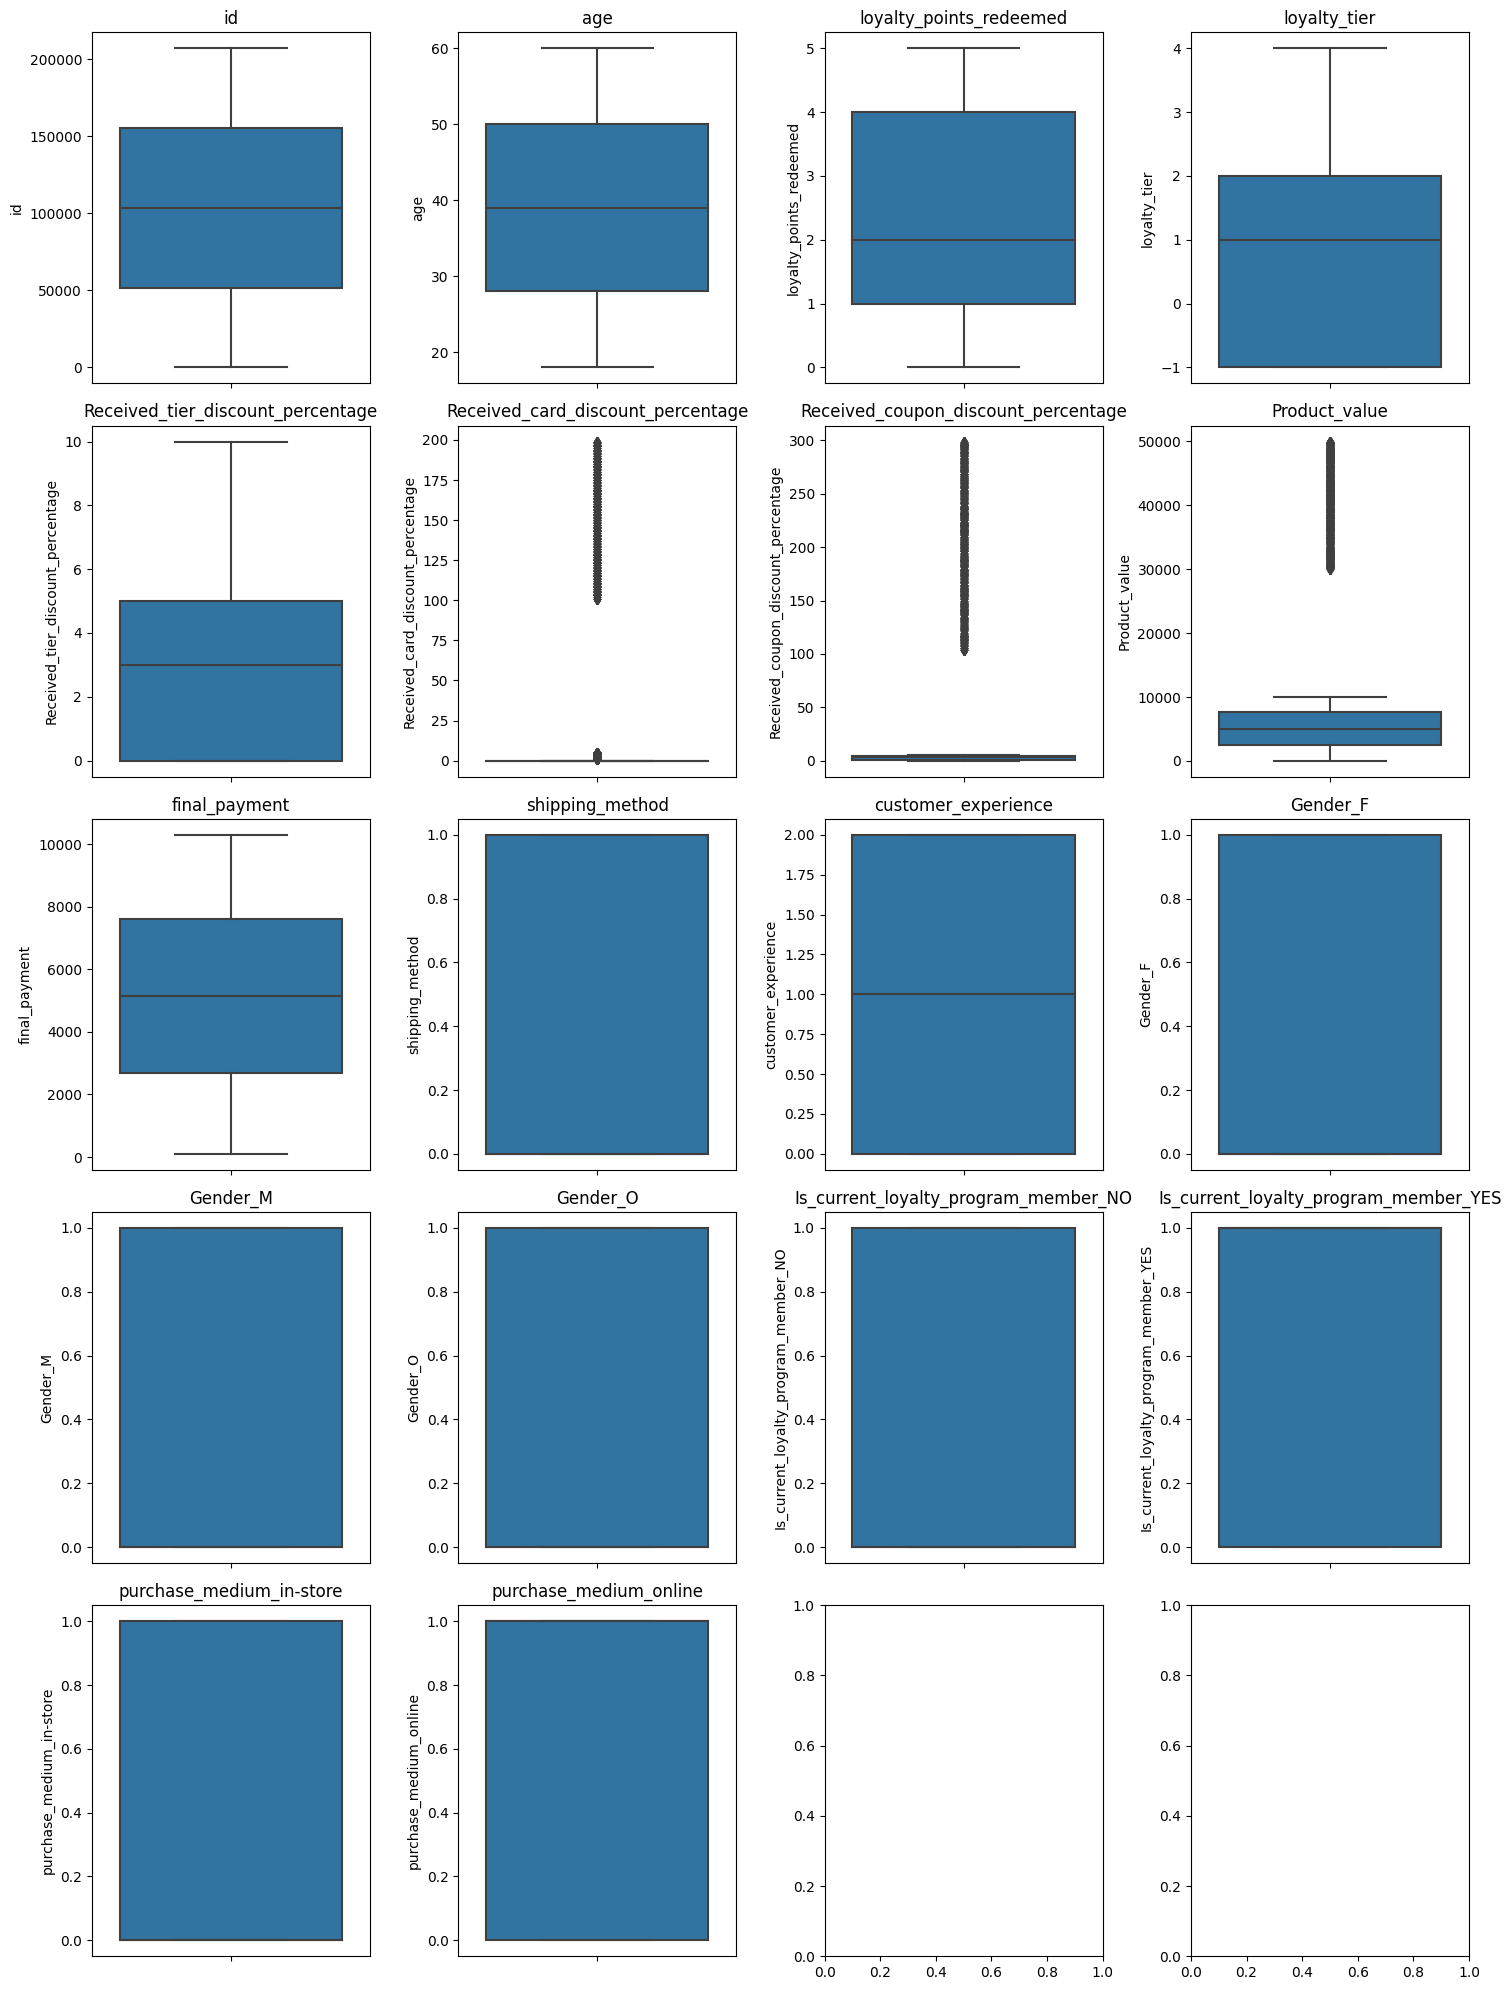

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = data.select_dtypes(include=['number']).columns

num_cols = 4
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows)) 

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

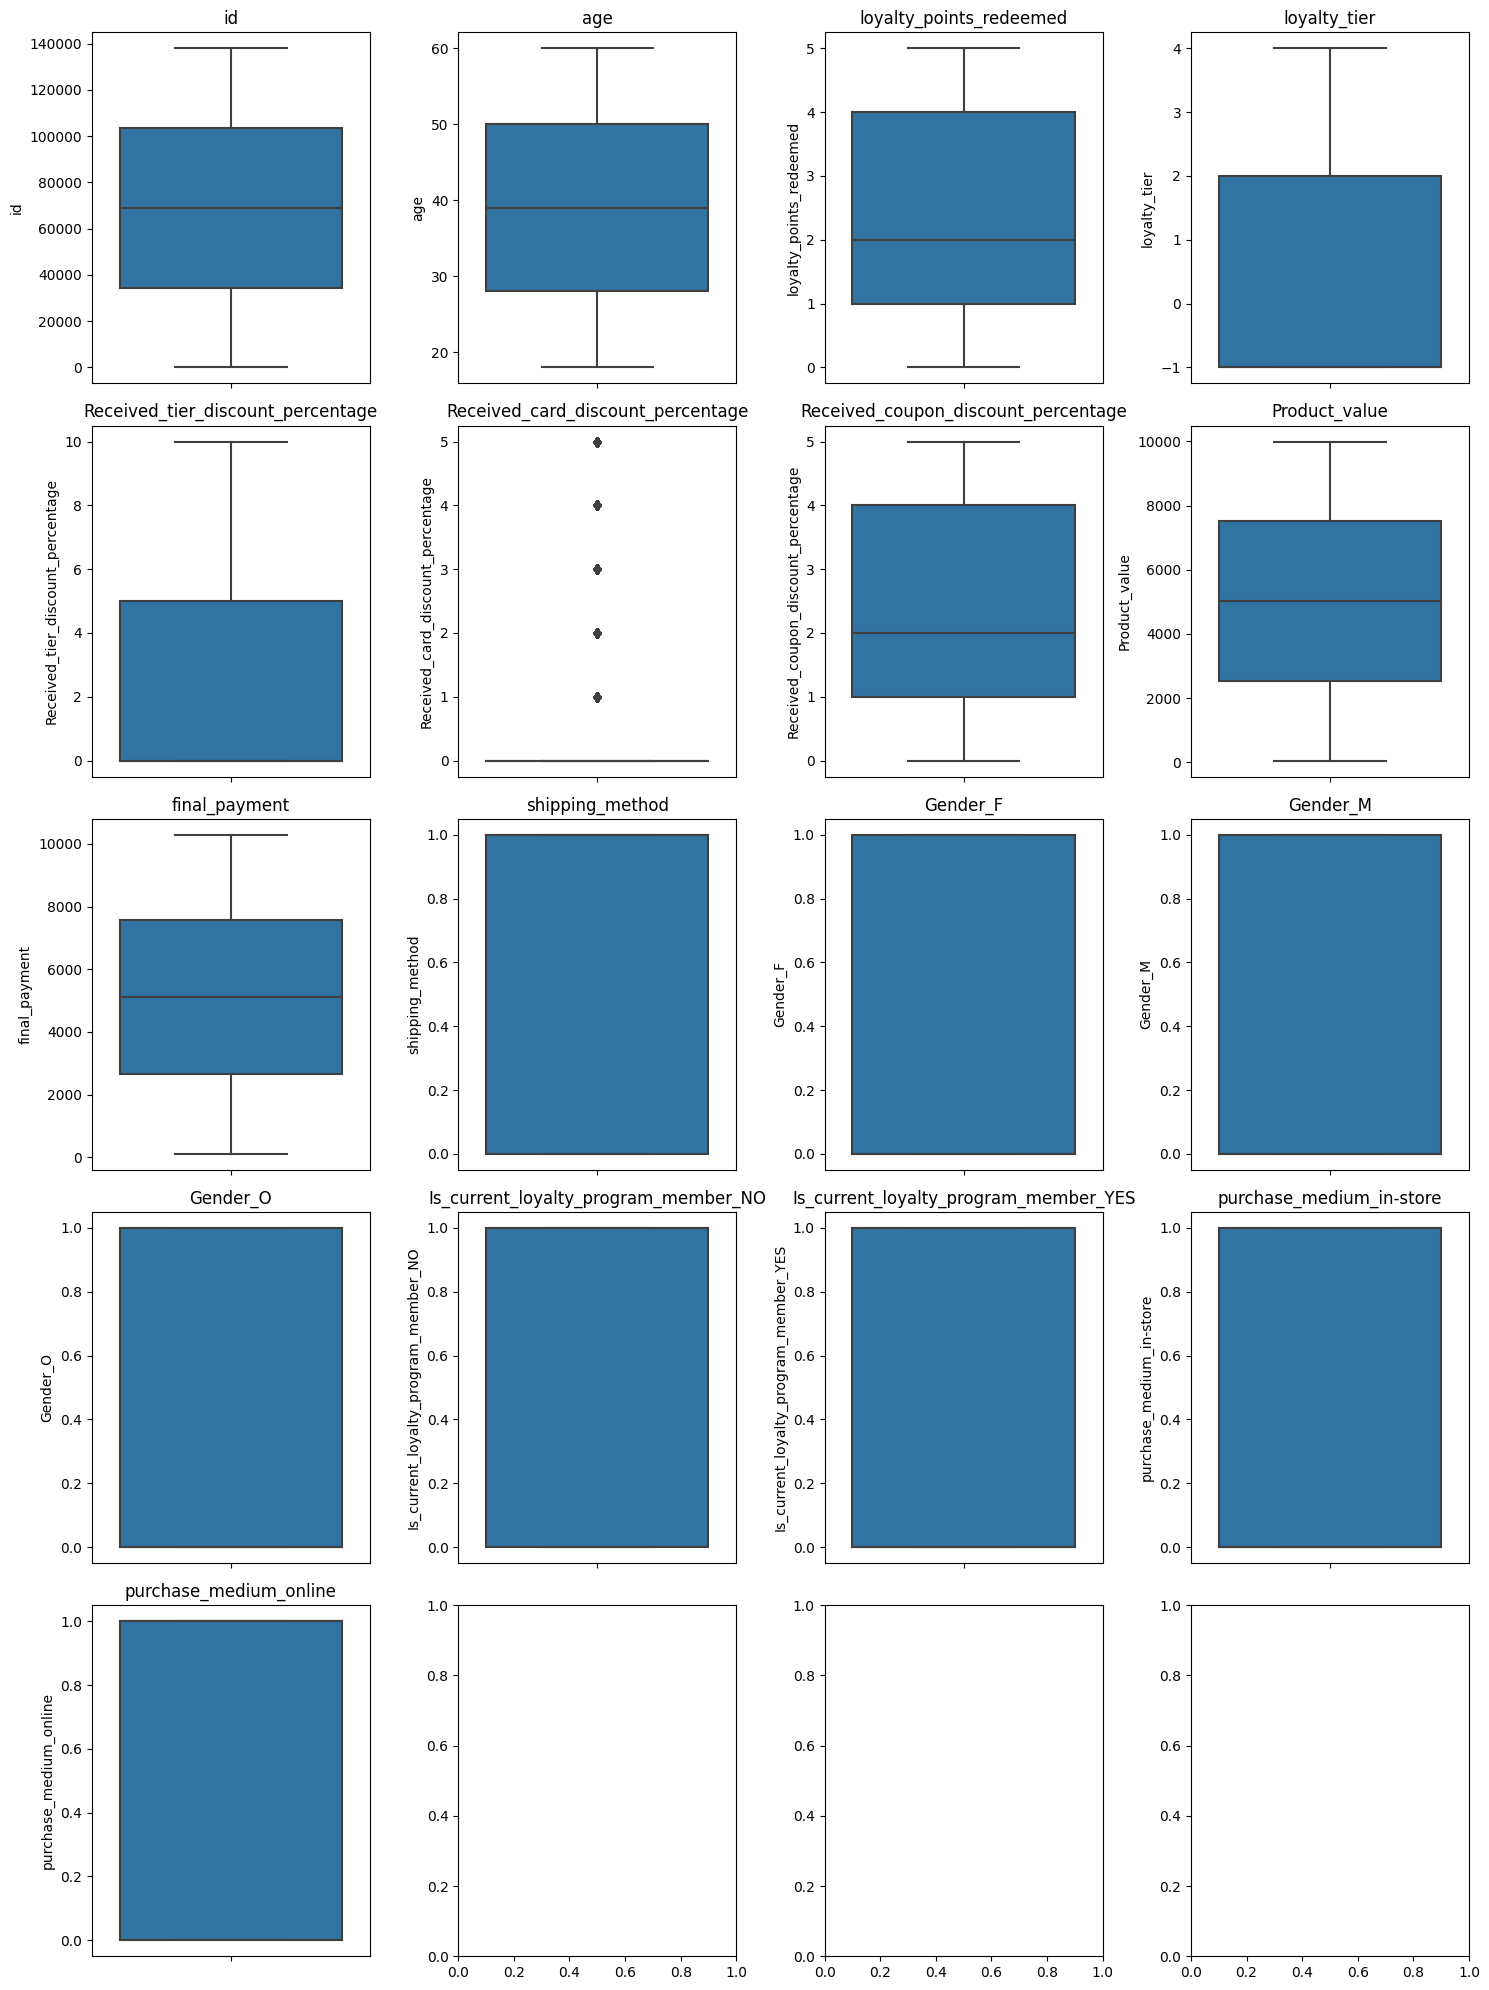

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = test.select_dtypes(include=['number']).columns

num_cols = 4
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows)) 

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=test[column], ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

## Hadling outliers

### Boxplot for 'data' dataset
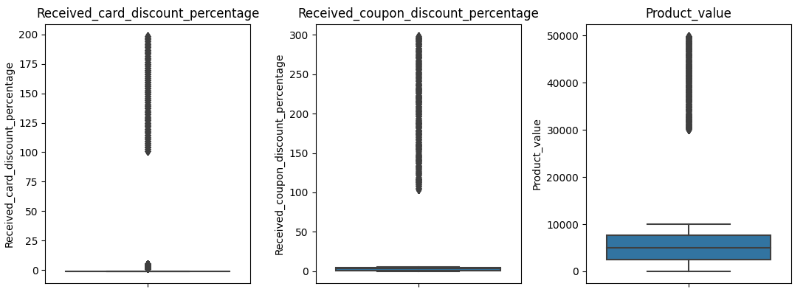

### Boxplot for 'test' dataset
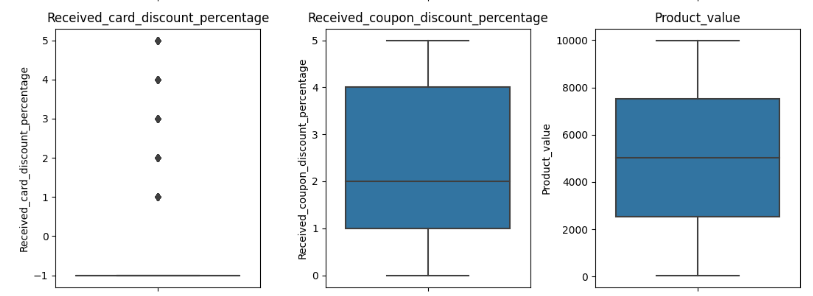

Referring to these boxplots, we observe outliers in the `data` dataset. Specifically:  

- `product_value` > 10,000  
- `Received_card_discount_percentage` > 5  
- `Received_coupon_discount_percentage` > 5  

These outliers are not present in the `test` dataset, so we can safely remove them to ensure consistency and improve the model's performance.

In [27]:
outlier_count = data[data['Product_value'] > 10000].shape[0]
print("Outlier count:", outlier_count)

Outlier count: 1679


In [28]:
data = data[data['Product_value'] <= 10000]
data = data[data['Received_card_discount_percentage'] <= 5]
data = data[data['Received_coupon_discount_percentage'] <= 5]

# Feature Engineering

In [29]:
def process_dataframe(df):

    # Financial Features
    # Discount amount features
    df['total_discount_percentage'] = df['Received_tier_discount_percentage'] + df['Received_card_discount_percentage'] + df['Received_coupon_discount_percentage']
    df['Total_Discount_Amount'] = df['Product_value'] * ((df['total_discount_percentage']) / 100)
  
    df['discount_amount_ratio'] = df['Total_Discount_Amount'] / (df['Product_value'] + 1e-9)
    df['high_discount_order'] = (df['Total_Discount_Amount'] > df['Total_Discount_Amount'].median()).astype(int)
    
    # shipping cost calculation
    df['shipping_cost'] = df['final_payment'] - (df['Product_value'] - df['Total_Discount_Amount'])
    df['shipping_cost_ratio'] = df['shipping_cost'] / df['Product_value']
    
    # Price sensitivity metrics
    df['price_tier'] = pd.qcut(df['Product_value'], q=5, labels=[0,1,2,3,4])
    df['discount_types_used'] = (df[['Received_tier_discount_percentage', 
                                   'Received_card_discount_percentage', 
                                   'Received_coupon_discount_percentage']] > 0).sum(axis=1)
    
    # Loyalty Features
    df['loyalty_engagement_score'] = df['loyalty_points_redeemed'] / df['Product_value']
    
    # Temporal Features
    # Purchase timing
    df['purchase_hour'] = df['purchased_datetime'].dt.hour
    df['purchase_day_of_week'] = df['purchased_datetime'].dt.dayofweek
    df['is_weekend_purchase'] = df['purchase_day_of_week'].isin([5, 6]).astype(int)
    df['is_business_hours'] = ((df['purchase_hour'] >= 9) & (df['purchase_hour'] <= 17)).astype(int)
    df['purchase_month'] = df['purchased_datetime'].dt.month
    df['purchase_quarter'] = df['purchased_datetime'].dt.quarter
    
    # Delivery Features
    df['receive_day_of_week'] = df['received_date'].dt.dayofweek
    df['processing_days'] = (df['released_date'] - df['purchased_datetime']).dt.days
    df['delivery_days'] = (df['received_date'] - df['released_date']).dt.days
    df['total_order_days'] = (df['received_date'] - df['purchased_datetime']).dt.days
    df['delivery_delay'] = (df['received_date'] - df['estimated_delivery_date']).dt.days
    df['is_delayed'] = (df['delivery_delay'] > 0).astype(int)
    
    # Customer Features
    df['customer_tenure_days'] = (df['purchased_datetime'] - df['Date_Registered']).dt.days
    df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 25, 35, 50, 65], 
                            labels=[0, 1, 2, 3])
    
    # Purchase History Features
    df['is_first_purchase'] = (df.groupby('user_id')['purchased_datetime'].cumcount() == 0).astype(int)
    df['purchase_count'] = df.groupby('user_id')['transaction_id'].transform('count')
    
    # Product Features
    df['product_category_encoded'] = pd.factorize(df['product_category'])[0]
    
    return df

In [30]:
# Apply the function to both dataframes
data = process_dataframe(data)
test = process_dataframe(test)

In [31]:
data =data.drop(columns=['user_id','transaction_id','product_category','payment_method'])
test =test.drop(columns=['user_id','transaction_id','product_category','payment_method'])

In [32]:
# Check for missing values in each column of X
print(data.isnull().sum())

id                                       0
age                                      0
Date_Registered                          0
loyalty_points_redeemed                  0
loyalty_tier                             0
Received_tier_discount_percentage        0
Received_card_discount_percentage        0
Received_coupon_discount_percentage      0
Product_value                            0
payment_datetime                         0
purchased_datetime                       0
final_payment                            0
released_date                            0
estimated_delivery_date                  0
received_date                            0
shipping_method                          0
customer_experience                      0
Gender_F                                 0
Gender_M                                 0
Gender_O                                 0
Is_current_loyalty_program_member_NO     0
Is_current_loyalty_program_member_YES    0
purchase_medium_in-store                 0
purchase_me

# Identify patterns in dataset w.r.t. target_variable

In [33]:
# numerical_columns = df.select_dtypes(include=int).columns.to_list()

# plt.figure(figsize=(16, 4))
# for i, col in enumerate(numerical_columns):
#     plt.subplot(8, 4, i+1)
#     sns.countplot(data=data, x=col, hue='customer_experience')
# plt.tight_layout()
# plt.show()

## Boxplots

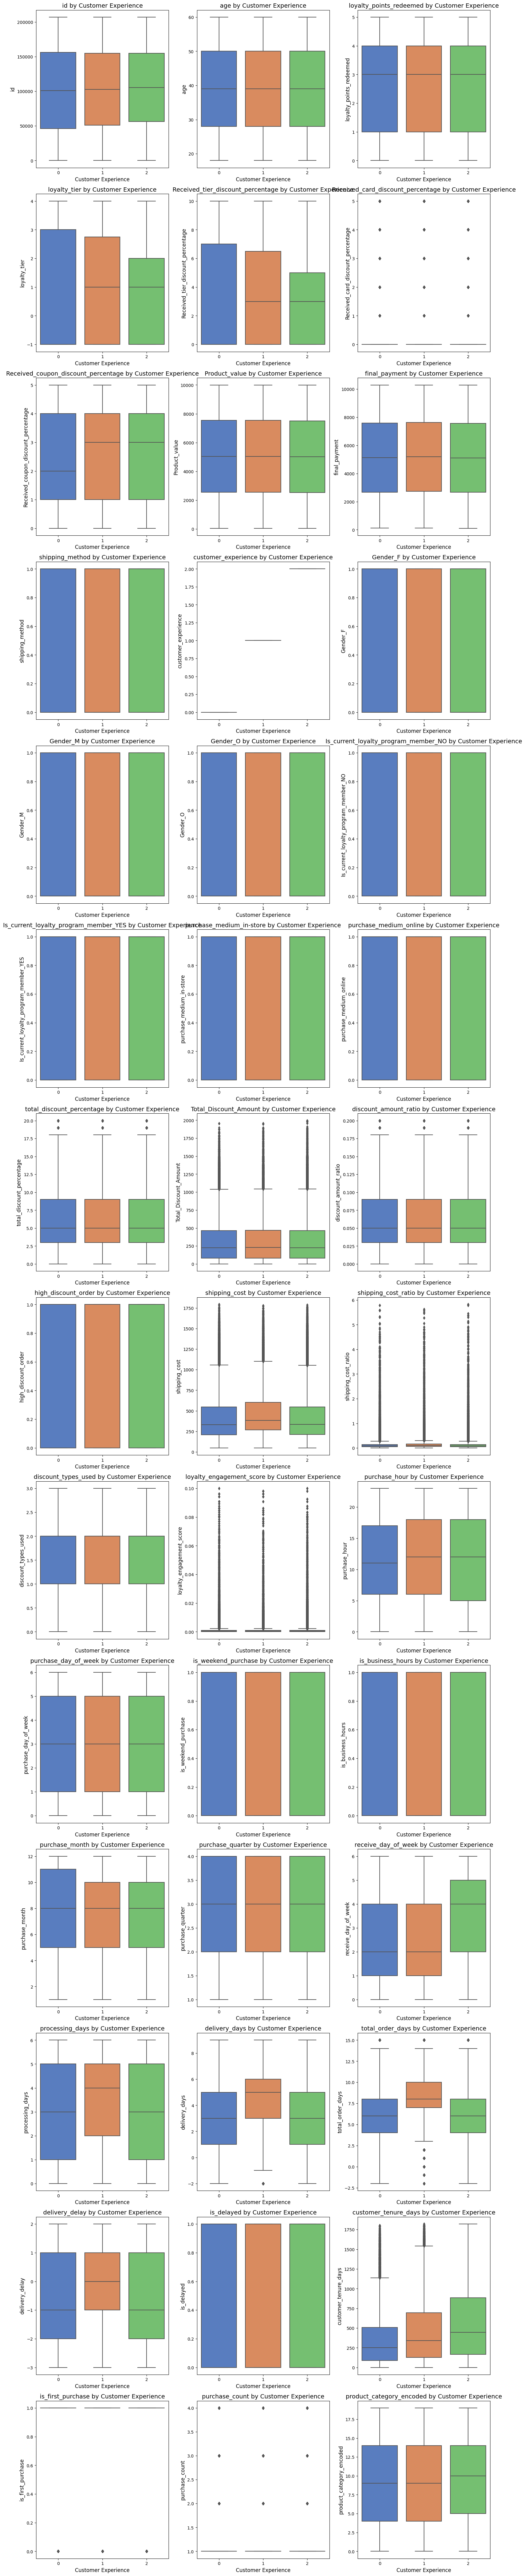

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numerical columns excluding `customer_experience`
numerical_columns = data.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
plt.figure(figsize=(16, 6 * len(numerical_columns)))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 3, i)
    sns.boxplot(data=data, x='customer_experience', y=col, palette="muted")
    plt.title(f'{col} by Customer Experience', fontsize=14)
    plt.xlabel('Customer Experience', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()

plt.show()


## Violin Plots

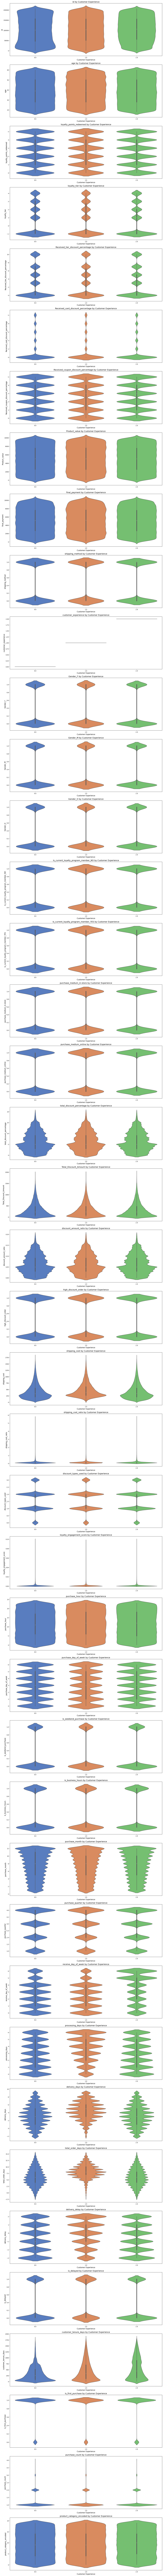

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns to plot
columns_to_plot =  data.select_dtypes(include=['number']).columns


# Create a copy of the dataframe to avoid modifying the original
plot_data = data.copy()

# Convert customer_experience to float64
plot_data['customer_experience'] = plot_data['customer_experience'].astype('float64')

# Convert all columns to plot to float64
for col in columns_to_plot:
    plot_data[col] = plot_data[col].astype('float64')

# Create violin plots
plt.figure(figsize=(16, 6 * len(columns_to_plot)))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.violinplot(data=plot_data, 
                  x='customer_experience', 
                  y=col,
                  palette="muted")
    plt.title(f'{col} by Customer Experience', fontsize=14)
    plt.xlabel('Customer Experience', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
plt.tight_layout()
plt.show()

## Corelation Plots

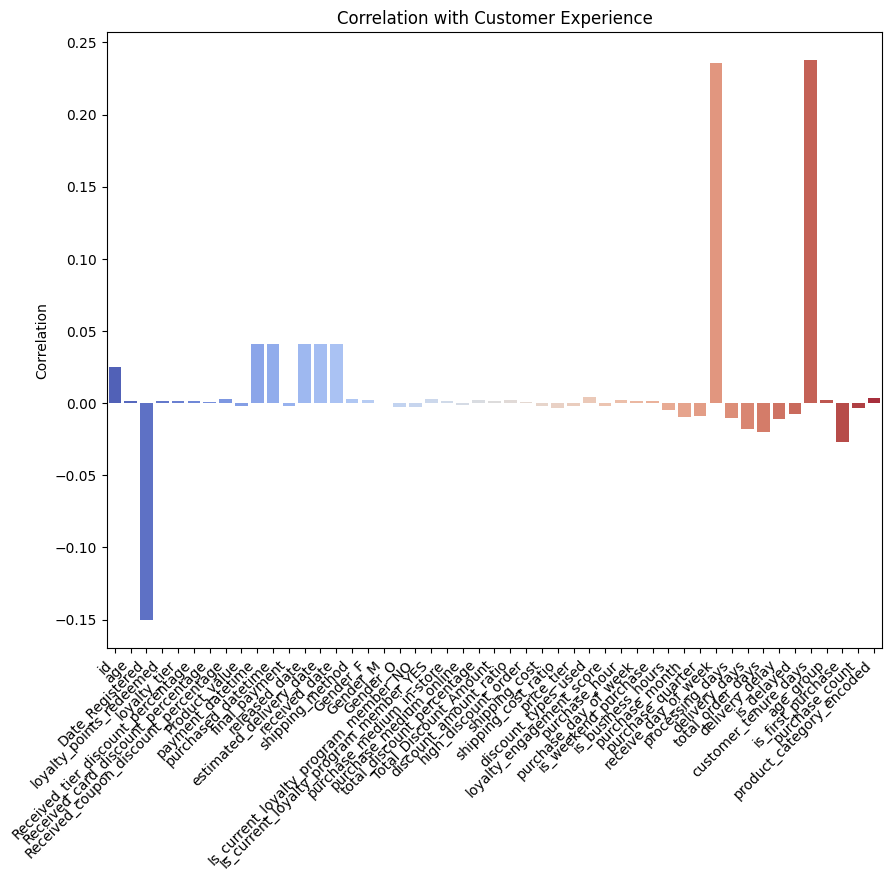

In [36]:
# Calculate the correlation matrix for all columns
cor_mat = data.corr(method="pearson")

# Extract the correlation values with 'customer_experience'
customer_experience_corr = cor_mat['customer_experience']

# Create a new DataFrame that includes the correlation with 'customer_experience' for all other columns
cor_mat_customer_experience = customer_experience_corr.drop('customer_experience')  # Drop the self-correlation

# Plot the correlation with 'customer_experience'
plt.figure(figsize=(10, 8))
sns.barplot(x=cor_mat_customer_experience.index, y=cor_mat_customer_experience.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Correlation with Customer Experience")
plt.ylabel("Correlation")
plt.show()


Correlation with Customer Experience (sorted by magnitude):
customer_tenure_days                     0.237741
receive_day_of_week                      0.236090
Date_Registered                          0.150373
payment_datetime                         0.040876
purchased_datetime                       0.040876
released_date                            0.040824
estimated_delivery_date                  0.040753
received_date                            0.040707
is_first_purchase                        0.027057
id                                       0.025329
total_order_days                         0.020214
delivery_days                            0.017774
delivery_delay                           0.010667
processing_days                          0.010008
purchase_month                           0.009518
purchase_quarter                         0.008591
is_delayed                               0.007229
discount_types_used                      0.004490
is_business_hours                       

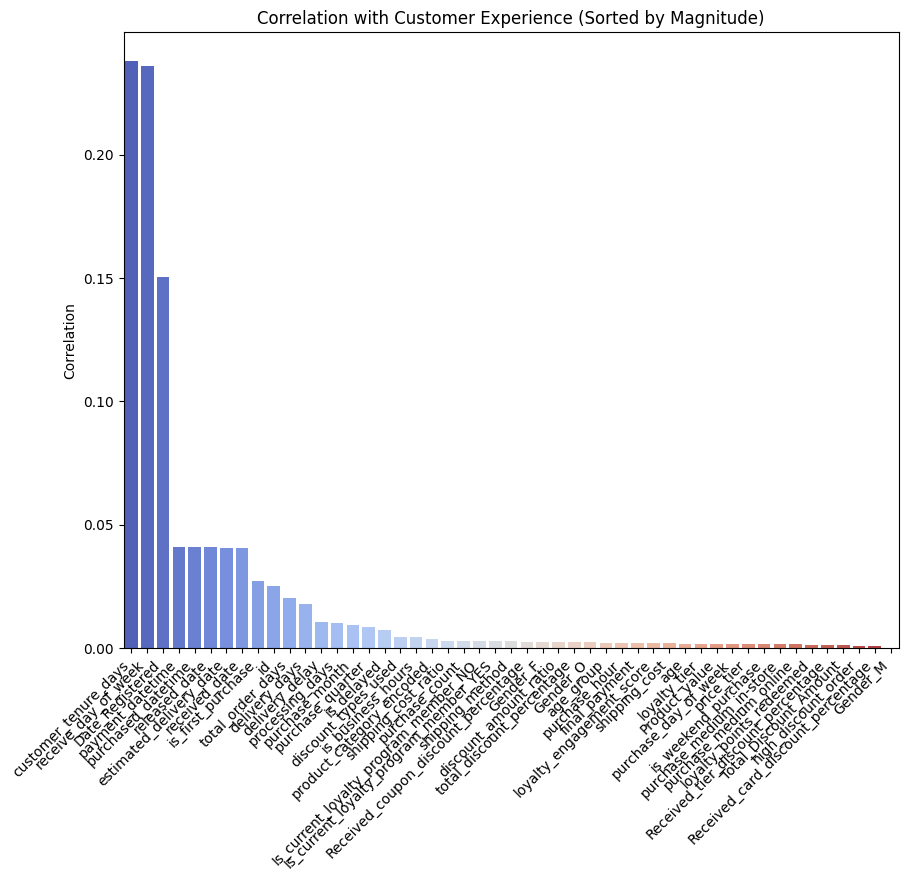

In [37]:
# Sort the correlation values by absolute value in descending order
sorted_customer_experience_corr = cor_mat_customer_experience.abs().sort_values(ascending=False)

# Print the sorted correlation values
print("Correlation with Customer Experience (sorted by magnitude):")
print(sorted_customer_experience_corr)

# Plot the sorted correlation
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_customer_experience_corr.index, y=sorted_customer_experience_corr.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Correlation with Customer Experience (Sorted by Magnitude)")
plt.ylabel("Correlation")
plt.show()


In [38]:
# data.columns.to_list()

## MI Score

In [39]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    X = X.dropna()  
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [40]:
data.columns

Index(['id', 'age', 'Date_Registered', 'loyalty_points_redeemed',
       'loyalty_tier', 'Received_tier_discount_percentage',
       'Received_card_discount_percentage',
       'Received_coupon_discount_percentage', 'Product_value',
       'payment_datetime', 'purchased_datetime', 'final_payment',
       'released_date', 'estimated_delivery_date', 'received_date',
       'shipping_method', 'customer_experience', 'Gender_F', 'Gender_M',
       'Gender_O', 'Is_current_loyalty_program_member_NO',
       'Is_current_loyalty_program_member_YES', 'purchase_medium_in-store',
       'purchase_medium_online', 'total_discount_percentage',
       'Total_Discount_Amount', 'discount_amount_ratio', 'high_discount_order',
       'shipping_cost', 'shipping_cost_ratio', 'price_tier',
       'discount_types_used', 'loyalty_engagement_score', 'purchase_hour',
       'purchase_day_of_week', 'is_weekend_purchase', 'is_business_hours',
       'purchase_month', 'purchase_quarter', 'receive_day_of_week',
    

In [41]:
X = data.drop(['id','customer_experience','Date_Registered', 'payment_datetime', 'purchased_datetime', 
                    'released_date', 'estimated_delivery_date', 'received_date'], axis=1)
y = data['customer_experience']

receive_day_of_week                      0.063256
total_order_days                         0.059957
customer_tenure_days                     0.046933
delivery_days                            0.029240
shipping_cost                            0.022265
is_delayed                               0.018806
is_first_purchase                        0.018229
processing_days                          0.015672
purchase_count                           0.015311
delivery_delay                           0.013506
shipping_method                          0.013201
is_weekend_purchase                      0.012286
is_business_hours                        0.010892
high_discount_order                      0.008658
shipping_cost_ratio                      0.007209
discount_types_used                      0.005962
purchase_quarter                         0.005060
Is_current_loyalty_program_member_YES    0.003529
purchase_month                           0.003511
discount_amount_ratio                    0.002680


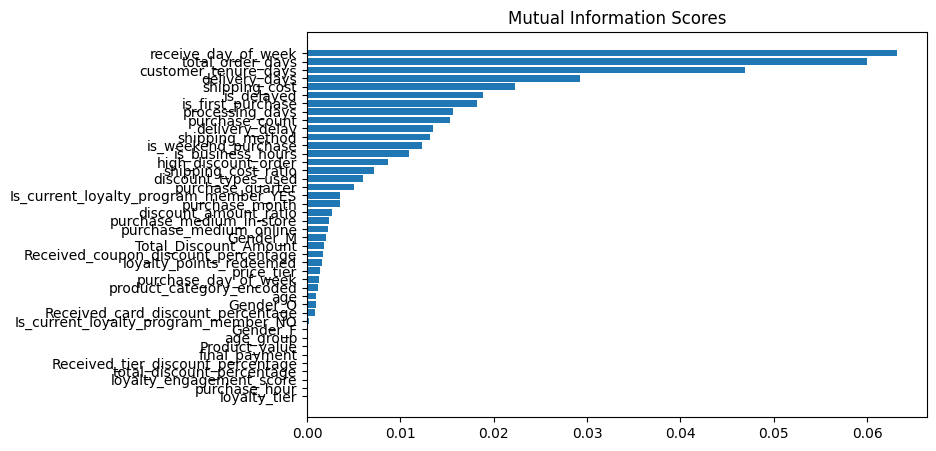

In [42]:

mi_scores = make_mi_scores(X, y)

print(mi_scores)
# print(mi_scores.tail(20))  

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
# plot_mi_scores(mi_scores.tail(20)) 

# Prepare Data for modeling

Based on Plot representations, correlation and mutual information scores, We can use the following key features to predict customer_experience:

For example, look at this violin plot showing the relationship between `receive_day_of_week` and `customer_Experience`. We can clearly observe a noticeable pattern or correlation between them.

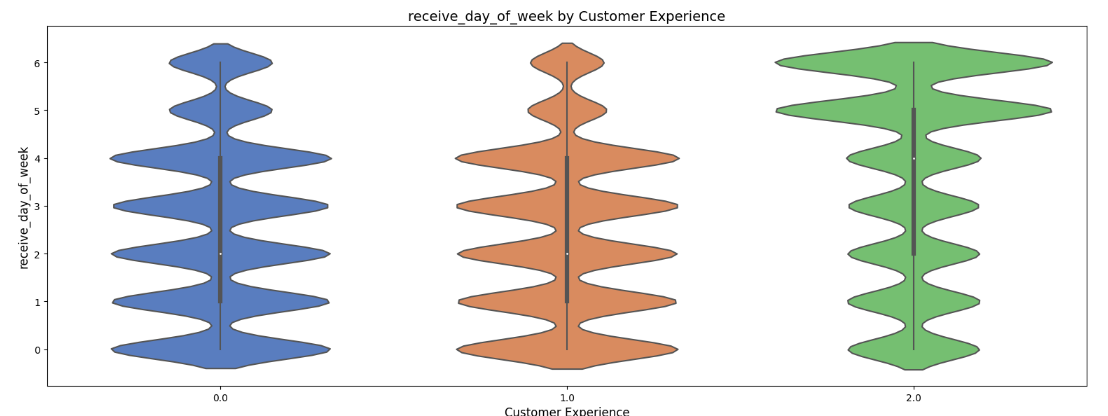

In [43]:
selected_features=['loyalty_points_redeemed',
       'loyalty_tier', 'Received_tier_discount_percentage',
       'Received_card_discount_percentage',
       'Received_coupon_discount_percentage', 'Product_value',
        'final_payment','shipping_method', 'Gender_F', 'Gender_M',
       'Gender_O', 'Is_current_loyalty_program_member_NO',
       'Is_current_loyalty_program_member_YES', 'purchase_medium_in-store',
       'purchase_medium_online', 'total_discount_percentage',
       'Total_Discount_Amount', 'discount_amount_ratio', 'high_discount_order',
       'shipping_cost', 'shipping_cost_ratio', 'price_tier',
       'discount_types_used', 'loyalty_engagement_score', 'purchase_hour',
       'purchase_day_of_week', 'is_weekend_purchase', 'is_business_hours',
       'purchase_month', 'purchase_quarter', 'receive_day_of_week',
       'processing_days', 'delivery_days', 'total_order_days',
       'delivery_delay', 'is_delayed', 'customer_tenure_days', 'age_group',
       'is_first_purchase', 'purchase_count', 'product_category_encoded']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create feature set
X = data[selected_features].copy()

# Target variable
y = data['customer_experience']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

# Define models with optimized parameters
models = {
    'XGBoost': XGBClassifier(
        objective='multi:softmax', 
        num_class=3,
        learning_rate=0.1,
        n_estimators=200,
        max_depth=5,
        random_state=42,
        eval_metric='mlogloss'
    ),
    'LightGBM': LGBMClassifier(
        objective='multiclass', 
        num_class=3,
        learning_rate=0.1,
        n_estimators=90,
        num_leaves=64,
        feature_fraction=0.9,
        bagging_fraction=0.9,
        lambda_l1=0.1,
        lambda_l2=0.1,
        random_state=42
    )
    # , 'Catboost' : CatBoostClassifier(
    #     loss_function='MultiClass', 
    #     random_state=42, 
    #     verbose=0
    # ),
    # 'MLP': MLPClassifier(
    #     random_state=42
    # ),
    # 'RandomForest': RandomForestClassifier(
    #     n_estimators=200,
    #     max_depth=10,
    #     min_samples_split=5,
    #     min_samples_leaf=2,
    #     random_state=42
    # ),
    # 'GradientBoosting': GradientBoostingClassifier(
    #     learning_rate=0.1,
    #     n_estimators=200,
    #     max_depth=5,
    #     min_samples_split=5,
    #     random_state=42
    # )
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Print feature importance if available
    if hasattr(model, 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        print(f"\n{model_name} Feature Importances:")
        print(importances)
    elif hasattr(model, 'coef_'):
        # For models like Logistic Regression
        importances = pd.DataFrame({
            'feature': X_train.columns,
            'importance': np.abs(model.coef_[0])  # Using absolute values for coefficient importance
        }).sort_values('importance', ascending=False)
        print(f"\n{model_name} Feature Importances (based on coefficients):")
        print(importances)

# Train and evaluate all models
for model_name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test, model_name)


Training XGBoost...
Accuracy: 0.6610
F1 Score: 0.6620

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62     13707
           1       0.69      0.71      0.70      9408
           2       0.71      0.64      0.68     17416

    accuracy                           0.66     40531
   macro avg       0.66      0.67      0.66     40531
weighted avg       0.67      0.66      0.66     40531


Confusion Matrix:
 [[ 8902  1777  3028]
 [ 1227  6679  1502]
 [ 4999  1205 11212]]

XGBoost Feature Importances:
                                  feature  importance
30                    receive_day_of_week    0.295268
18                    high_discount_order    0.231858
33                       total_order_days    0.084771
36                   customer_tenure_days    0.081929
22                    discount_types_used    0.053761
19                          shipping_cost    0.047690
16                  Total_Discount_Amount    0.

# Hyperparameter Optimization of LGBMClassifier

If you want, you can optimize model accuracy by **hyperparameter optimization**. This process helps fine-tune the model by finding the best combination of settings that improve its performance. By adjusting parameters like learning rate, tree depth, or regularization strength, the model becomes more precise in capturing patterns while avoiding overfitting. This leads to a more accurate and reliable model when making predictions.

Here’s a code snippet for hyperparameter optimization of the LightGBM model using `RandomizedSearchCV` from scikit-learn:

In [46]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'n_estimators': [50, 90, 120, 150],
#     'num_leaves': [31, 64, 128, 256],
#     'feature_fraction': [0.6, 0.7, 0.8, 0.9],
#     'bagging_fraction': [0.6, 0.7, 0.8, 0.9],
#     'lambda_l1': [0.0, 0.1, 0.5, 1.0],
#     'lambda_l2': [0.0, 0.1, 0.5, 1.0],
#     'random_state': [42]
# }

# # Initialize the LightGBM classifier
# lgbm = LGBMClassifier(objective='multiclass', num_class=3)

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_grid,
#     n_iter=50,  # Number of parameter combinations to try
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1  # Use all available processors
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best Accuracy:", random_search.best_score_)


# Stacking

You can also use stacking to increase the accuracy of predictions. Stacking is an ensemble learning technique that combines predictions from multiple models to improve accuracy. Instead of relying on a single model, stacking uses multiple base models (e.g., LightGBM, Random Forest, XGBoost) to make predictions, and then a meta-model (or blender) combines these predictions to produce the final output.  

**How it works:**  
- Train multiple base models on the same dataset.  
- Generate predictions from each base model.  
- Use these predictions as input features for the meta-model.  
- The meta-model learns to assign weights to each base model’s predictions, effectively combining their strengths.  

For example, one model might perform better on specific patterns in the data, while another excels in different areas. The meta-model leverages these strengths to create a more accurate and robust final prediction.  

**How it contributes to accuracy:**  
By combining diverse models, stacking reduces the risk of overfitting to the training data and captures more complex relationships, leading to improved overall performance.  

In [47]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# # Define base models (including LightGBM)

# base_models = [
#         ('xgb', XGBClassifier(
#             learning_rate=0.05,
#             n_estimators=300,
#             max_depth=6,
#             subsample=0.8,
#             colsample_bytree=0.8,
#             random_state=42,
#             n_jobs=-1
#         )),
#         ('lgb', LGBMClassifier(
#             learning_rate=0.05,
#             n_estimators=300,
#             num_leaves=31,
#             subsample=0.8,
#             colsample_bytree=0.8,
#             random_state=42,
#             n_jobs=-1
#         )),
#         ('rf', RandomForestClassifier(
#             n_estimators=300,
#             max_depth=10,
#             min_samples_split=5,
#             min_samples_leaf=2,
#             random_state=42,
#             n_jobs=-1
#         ))
#     ]

# # Meta-model
# # meta_model = LogisticRegression(max_iter=1000)
# meta_model = LogisticRegression(max_iter=1000, penalty='l2', C=0.1) 
# # Meta model
# # meta_model = XGBClassifier(
# #     learning_rate=0.03,
# #     n_estimators=150,
# #     max_depth=4,
# #     subsample=0.8,
# #     colsample_bytree=0.8,
# #     random_state=42,
# #     n_jobs=-1
# # )

# # Create StackingClassifier
# stacking_clf = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model,
#     cv=5  # Cross-validation for better meta-model training
# )


# # Train StackingClassifier
# print("\nTraining StackingClassifier...")
# stacking_clf.fit(X_train, y_train)
# y_pred_stacking = stacking_clf.predict(X_test)

# # Evaluate performance
# print(f"Accuracy: {accuracy_score(y_test, y_pred_stacking):.4f}")
# print(f"F1 Score: {f1_score(y_test, y_pred_stacking, average='weighted'):.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_stacking))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))


# Predictions

In [48]:
# final_model =  XGBClassifier(learning_rate=0.1,n_estimators=200,max_depth=5,random_state=42,eval_metric='mlogloss')
final_model = LGBMClassifier(
        objective='multiclass', 
        num_class=3,
        learning_rate=0.1,
        n_estimators=90,
        num_leaves=64,
        feature_fraction=0.9,
        bagging_fraction=0.9,
        lambda_l1=0.1,
        lambda_l2=0.1,
        random_state=42
    )

final_model.fit(X, y)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021360 seconds.


LGBMClassifier(bagging_fraction=0.9, feature_fraction=0.9, lambda_l1=0.1,
               lambda_l2=0.1, n_estimators=90, num_class=3, num_leaves=64,
               objective='multiclass', random_state=42)

In [49]:
test = test[selected_features]
predictions = final_model.predict(test)
predictions

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


array([1, 1, 2, ..., 1, 0, 0], dtype=int8)

# Submission

In [50]:
submission = pd.read_csv('/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/sample_submission.csv')
submission['customer_experience'] = predictions


submission['customer_experience'] = submission['customer_experience'].replace(0,'bad')
submission['customer_experience'] = submission['customer_experience'].replace(1,'neutral')
submission['customer_experience'] = submission['customer_experience'].replace(2,'good')


submission.to_csv("submission.csv", index=False)

After running this code, your `Submission.csv` file will appear here. You can download it and submit it to the competition! 🎉  
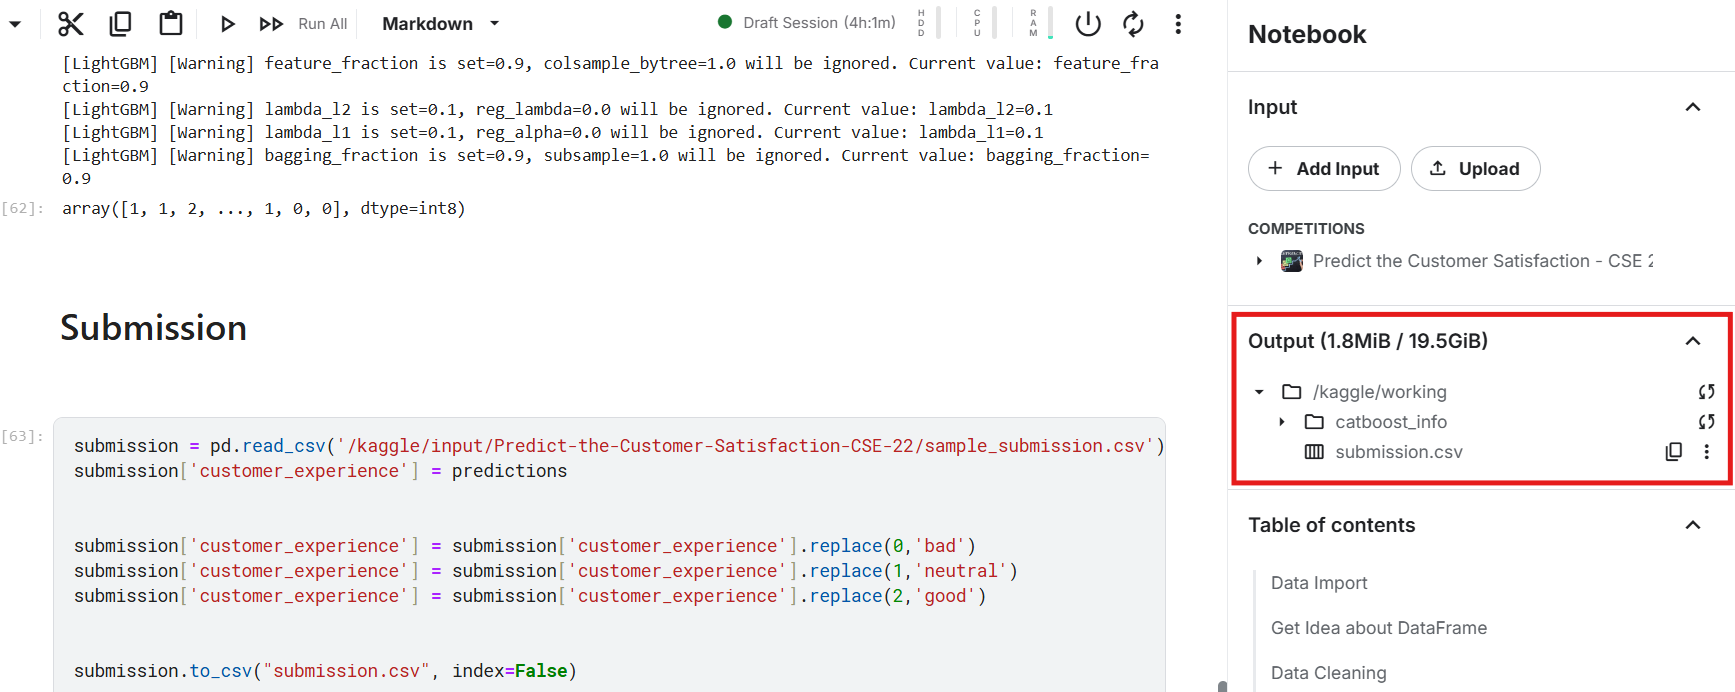

#### You did it! 🚀 Keep breaking limits, every step forward counts! Happy Kaggle-ing !🔥